In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings ("ignore")

In [2]:
data=pd.read_excel("Final_Train.xlsx")
data_test=pd.read_excel("Final_Test.xlsx")

In [3]:
data.head()

Qualification           Experience Rating  \
0           BHMS, MD - Homeopathy  24 years experience   100%   
1    BAMS, MD - Ayurveda Medicine  12 years experience    98%   
2  MBBS, MS - Otorhinolaryngology   9 years experience    NaN   
3             BSc - Zoology, BAMS  12 years experience    NaN   
4                            BAMS  20 years experience   100%   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                                  Miscellaneous_Info  Fees  
0               100% 16 Feedback Kakkanad, Ernakulam   100  
1              98% 76 Feedback Whitefield, Bangalore   350  
2                                                NaN   300  
3  Bannerghatta Road, Bangalore ₹250 Available on...   250  
4              100% 4 Feedback Keelkattalai, Chennai   250

In [4]:
data_test.head()

Qualification           Experience  \
0                                             MBBS  35 years experience   
1       MBBS, Diploma in Otorhinolaryngology (DLO)  31 years experience   
2                                       MBBS, DDVL  40 years experience   
3                                             BAMS   0 years experience   
4  BDS, MDS - Conservative Dentistry & Endodontics  16 years experience   

  Rating                        Place           Profile  \
0    NaN       Ghatkopar East, Mumbai  General Medicine   
1    NaN  West Marredpally, Hyderabad    ENT Specialist   
2    70%            KK Nagar, Chennai    Dermatologists   
3    NaN       New Ashok Nagar, Delhi          Ayurveda   
4   100%    Kanakpura Road, Bangalore           Dentist   

                                  Miscellaneous_Info  
0                                                NaN  
1                                                NaN  
2                   70% 4 Feedback KK Nagar, Chennai  
3                                                NaN  
4  General Dentistry Conservative Dentistry Cosme...

In [6]:
data.shape, data_test.shape

((5961, 7), (1987, 6))

In [7]:
data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [8]:
data.dtypes
data.info()
data.describe(include="object")
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


Fees
count  5961.000000
mean    307.944640
std     190.920373
min       5.000000
25%     150.000000
50%     300.000000
75%     500.000000
max     950.000000

In [5]:
data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="most_frequent")
data["Rating"]=si.fit_transform(data["Rating"].values.reshape(-1,1))

In [7]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="most_frequent")
data["Miscellaneous_Info"]=si.fit_transform(data["Miscellaneous_Info"].values.reshape(-1,1))

In [7]:
data.isnull().sum()

Qualification          0
Experience             0
Rating                 0
Place                 25
Profile                0
Miscellaneous_Info     0
Fees                   0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

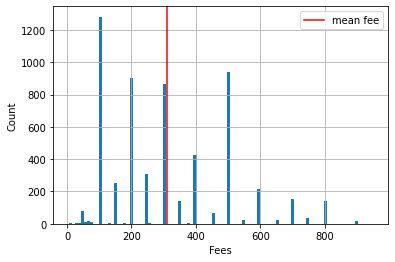

In [15]:
fee=data["Fees"].hist(bins=100)
mean_fee=np.mean(data["Fees"])
plt.axvline(mean_fee, color="red", label="mean fee")
plt.xlabel("Fees")
plt.ylabel("Count")
plt.legend()
plt.show()

In [16]:
data.Qualification.value_counts().nunique()

48

In [17]:
data.groupby("Qualification")["Fees"].aggregate(["mean", "median", max, min, "count", "std"])

mean  median  max  min  \
Qualification                                                                 
39 years experience                                 300.0     300  300  300   
Advanced Certificate Course in Aesthetic Dentis...  100.0     100  100  100   
Ayurvedic panchkarma, BAMS                          400.0     400  400  400   
B.Ac, BEMS                                          400.0     400  400  400   
B.Sc, BAMS                                          175.0     175  300   50   
...                                                   ...     ...  ...  ...   
Post Graduate Diploma in Diabetology (PGDD), MD...  100.0     100  100  100   
Post Graduate Diploma in Healthcare Management(...  500.0     500  500  500   
Post Graduate Diploma in Periodontics and Impla...  150.0     150  150  150   
Post MD SR AIIMS, MD - Dermatology, MBBS            700.0     700  700  700   
Training in Facial Aesthetics, MS - Otorhinolar...  300.0     300  300  300   

                                                    count         std  
Qualification                                                          
39 years experience                                     1         NaN  
Advanced Certificate Course in Aesthetic Dentis...      1         NaN  
Ayurvedic panchkarma, BAMS                              1         NaN  
B.Ac, BEMS                                              1         NaN  
B.Sc, BAMS                                              2  176.776695  
...                                                   ...         ...  
Post Graduate Diploma in Diabetology (PGDD), MD...      1         NaN  
Post Graduate Diploma in Healthcare Management(...      1         NaN  
Post Graduate Diploma in Periodontics and Impla...      1         NaN  
Post MD SR AIIMS, MD - Dermatology, MBBS                1         NaN  
Training in Facial Aesthetics, MS - Otorhinolar...      1         NaN  

[1419 rows x 6 columns]

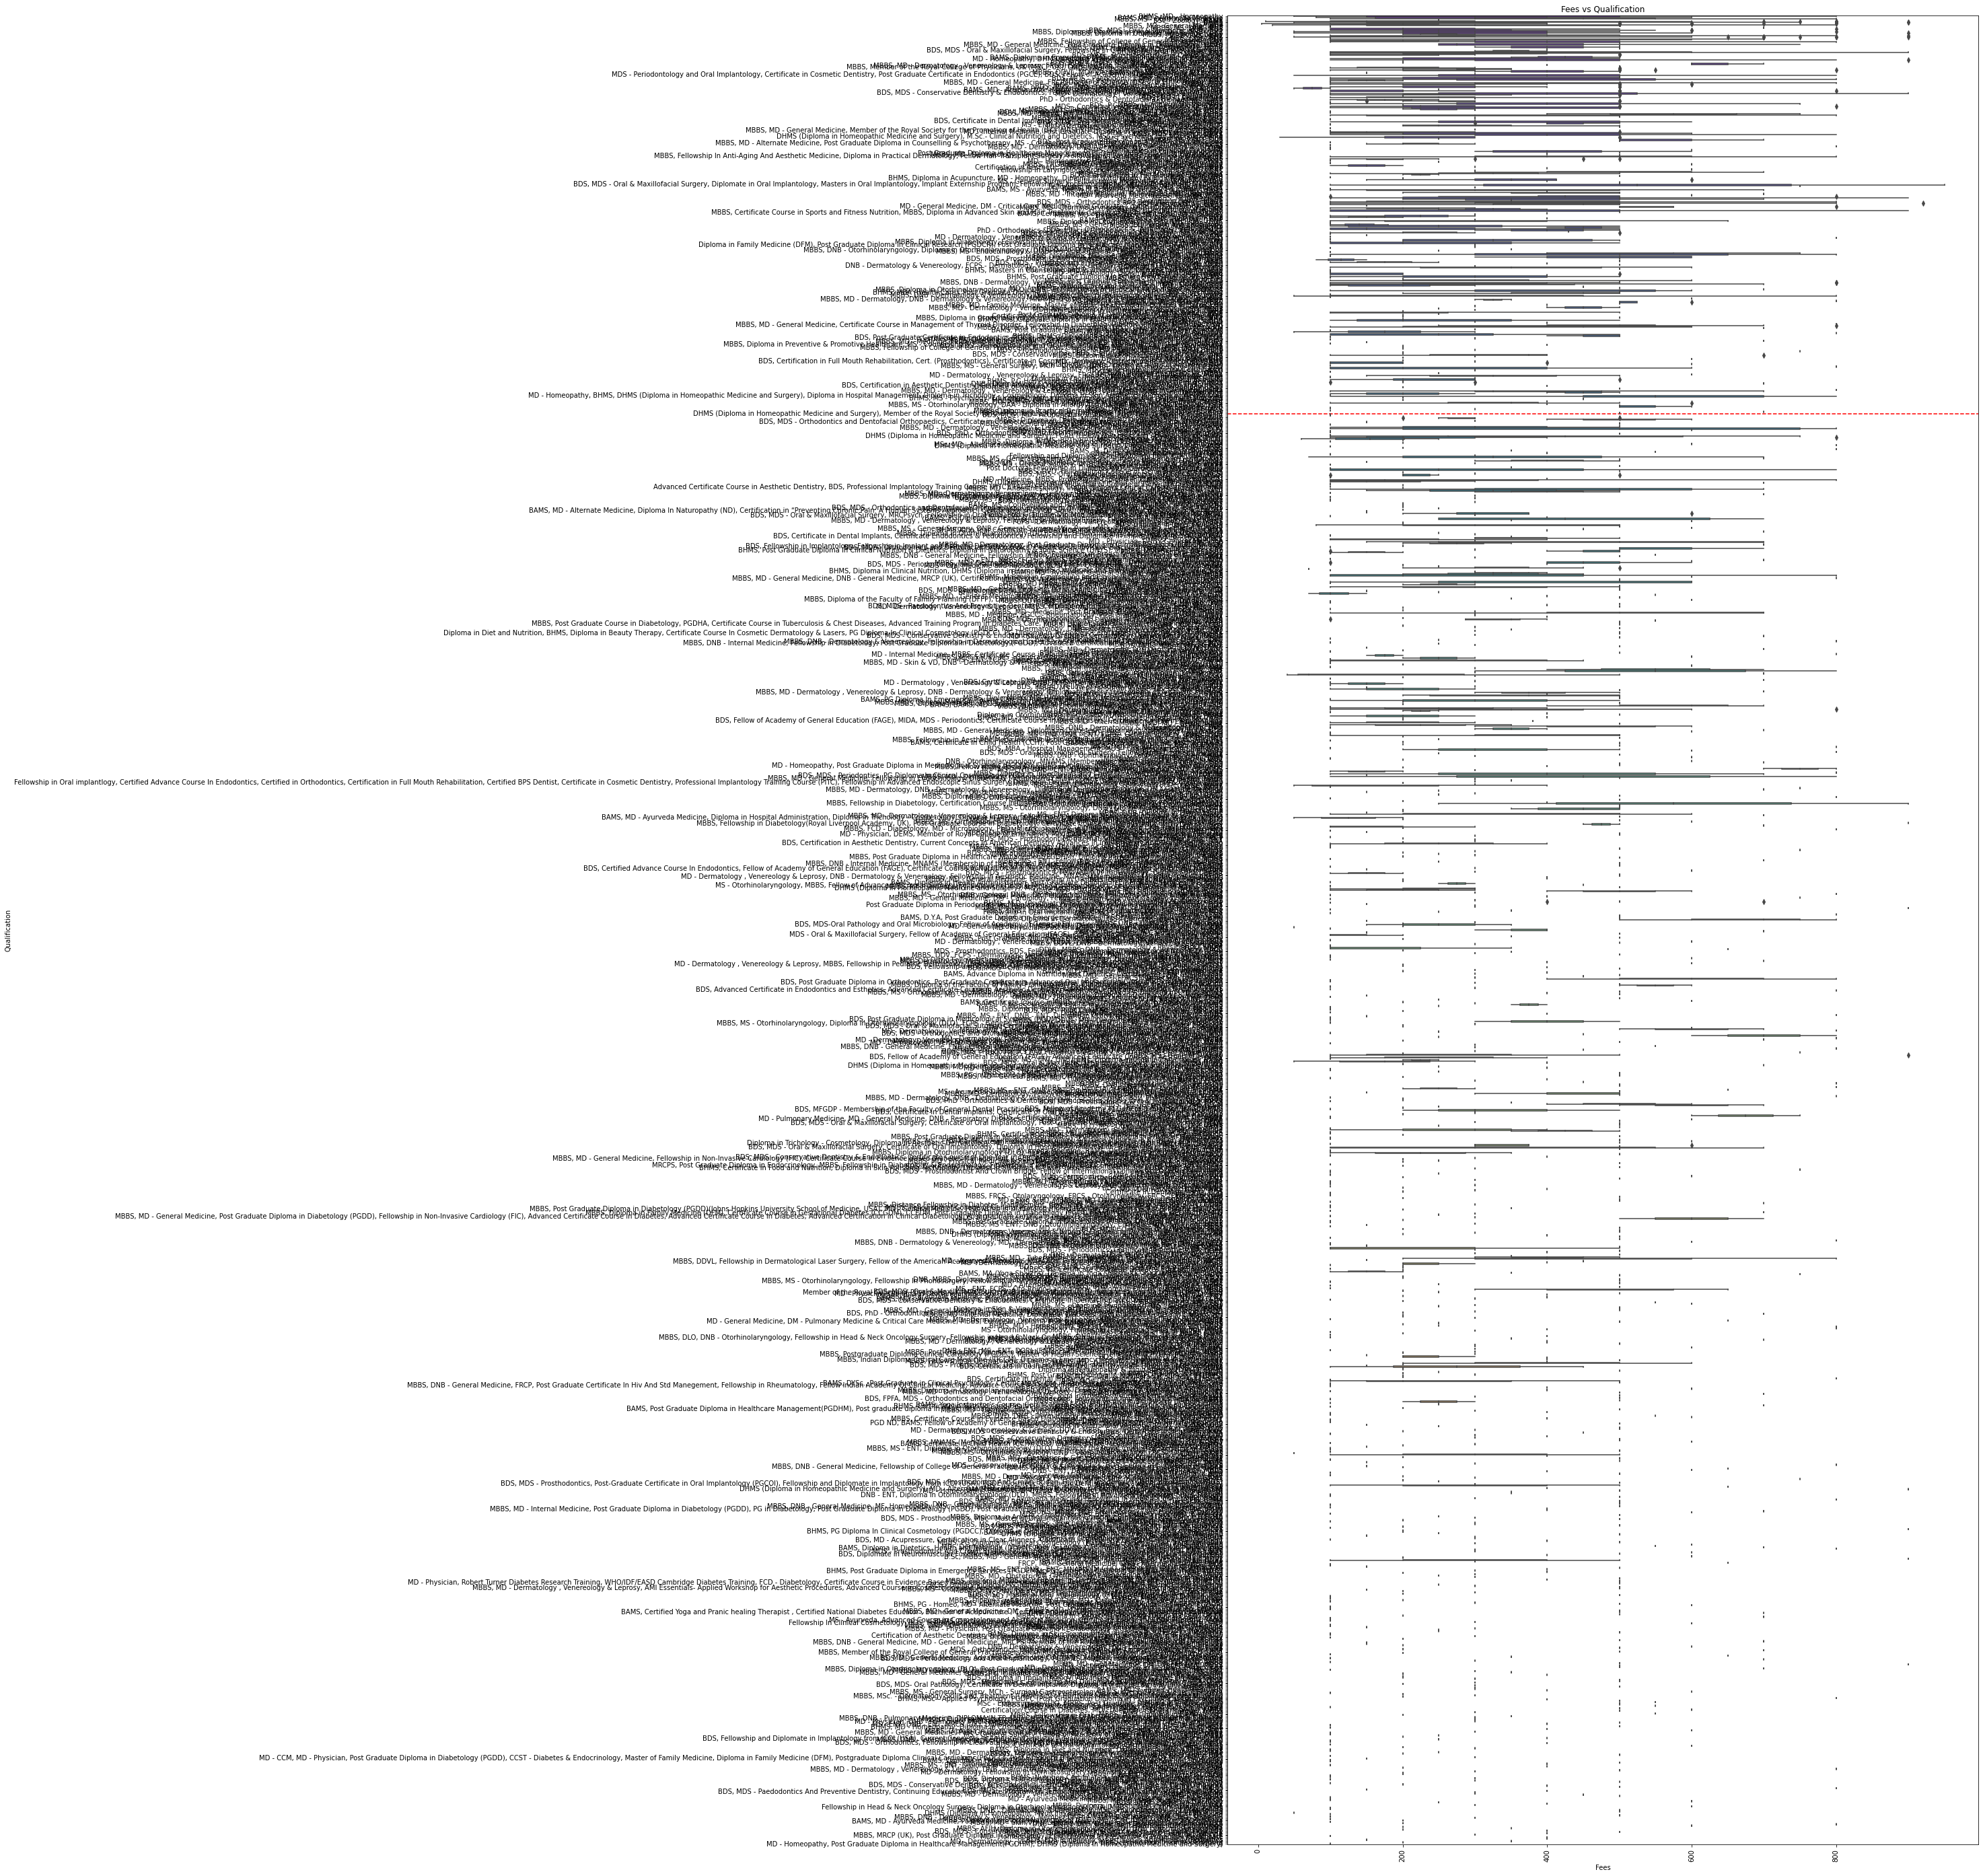

In [18]:
import seaborn as sns
plt.figure(figsize=(20,50))
mean_fee=np.mean(data["Fees"])
sns.boxplot(x="Fees", y="Qualification", data=data, palette="rainbow")
plt.axhline(mean_fee, color="red", linestyle="dashed")
plt.title("Fees vs Qualification")
plt.xticks(rotation="vertical")
plt.show()

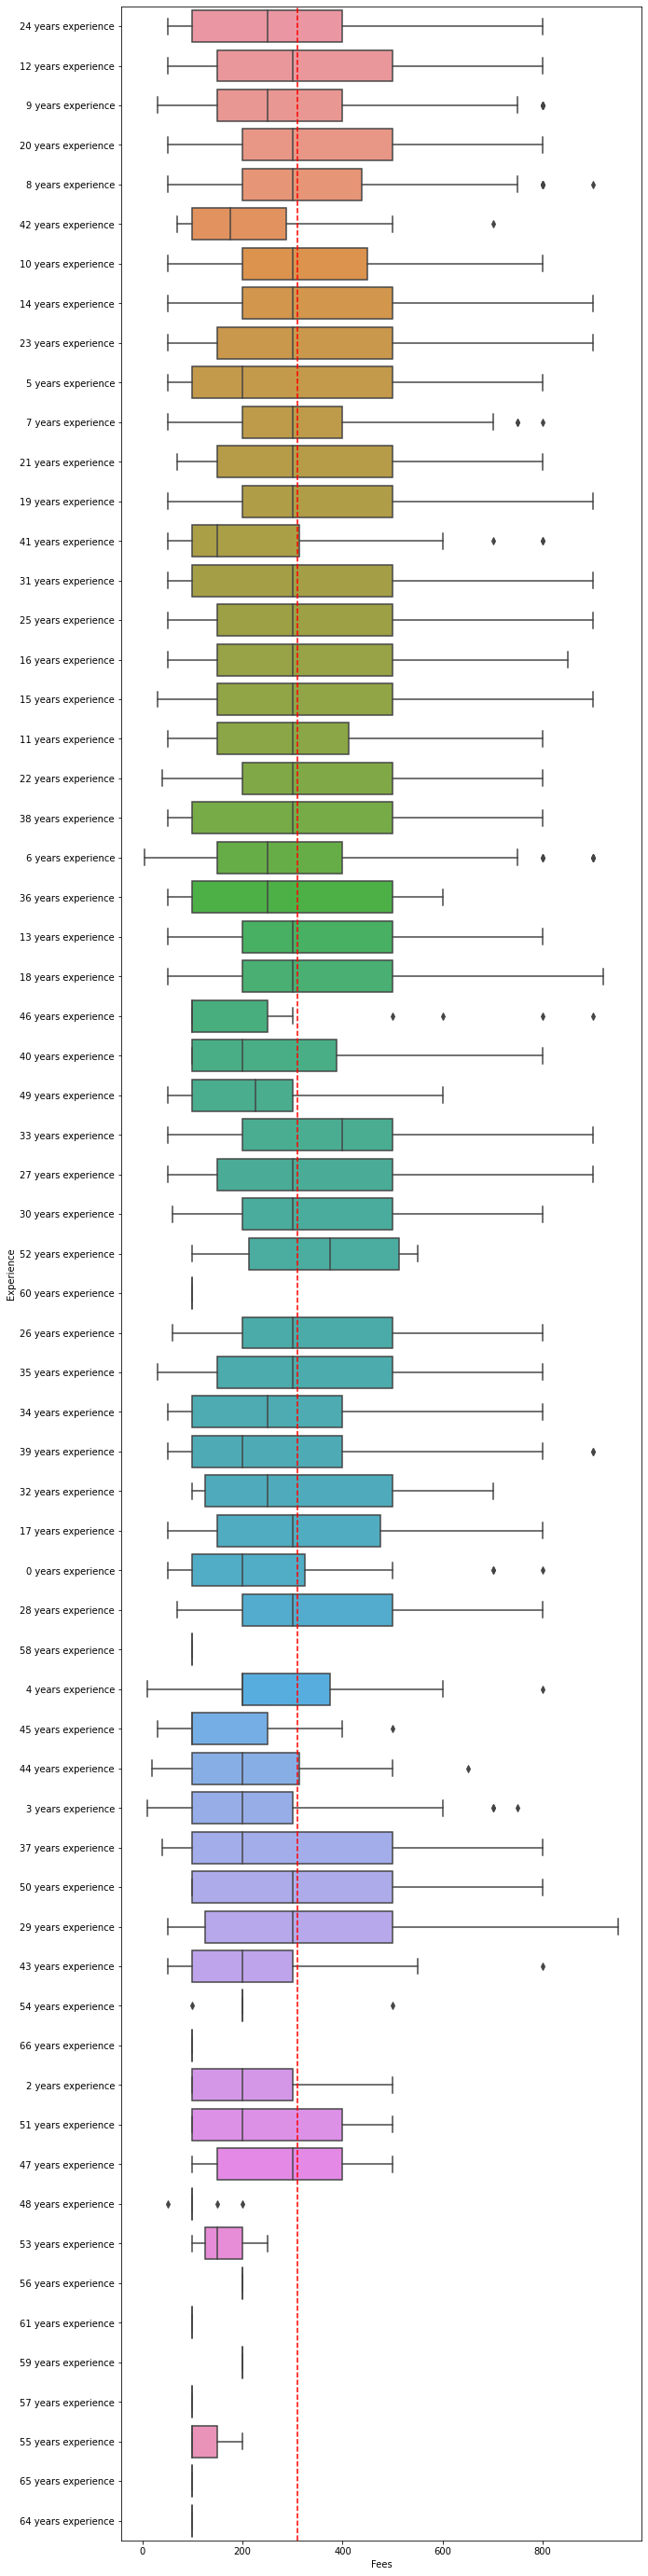

In [19]:
plt.figure(figsize=(10,50))
sns.boxplot(x="Fees", y="Experience", data=data)
plt.axvline(mean_fee, color="red", linestyle="dashed")
plt.show()

In [20]:
data.Rating.value_counts()

100%    3961
98%      290
99%      259
97%      241
96%      220
95%      178
94%      115
93%      109
90%       66
92%       66
91%       60
89%       42
88%       41
85%       27
82%       23
83%       21
86%       21
80%       19
77%       16
87%       14
84%       13
79%       13
81%       12
67%       12
71%        9
76%        9
73%        8
75%        8
74%        7
60%        7
78%        6
68%        5
56%        5
69%        4
70%        4
57%        3
72%        3
63%        2
64%        2
55%        2
62%        2
33%        2
7%         1
40%        1
47%        1
36%        1
48%        1
53%        1
45%        1
65%        1
58%        1
Name: Rating, dtype: int64

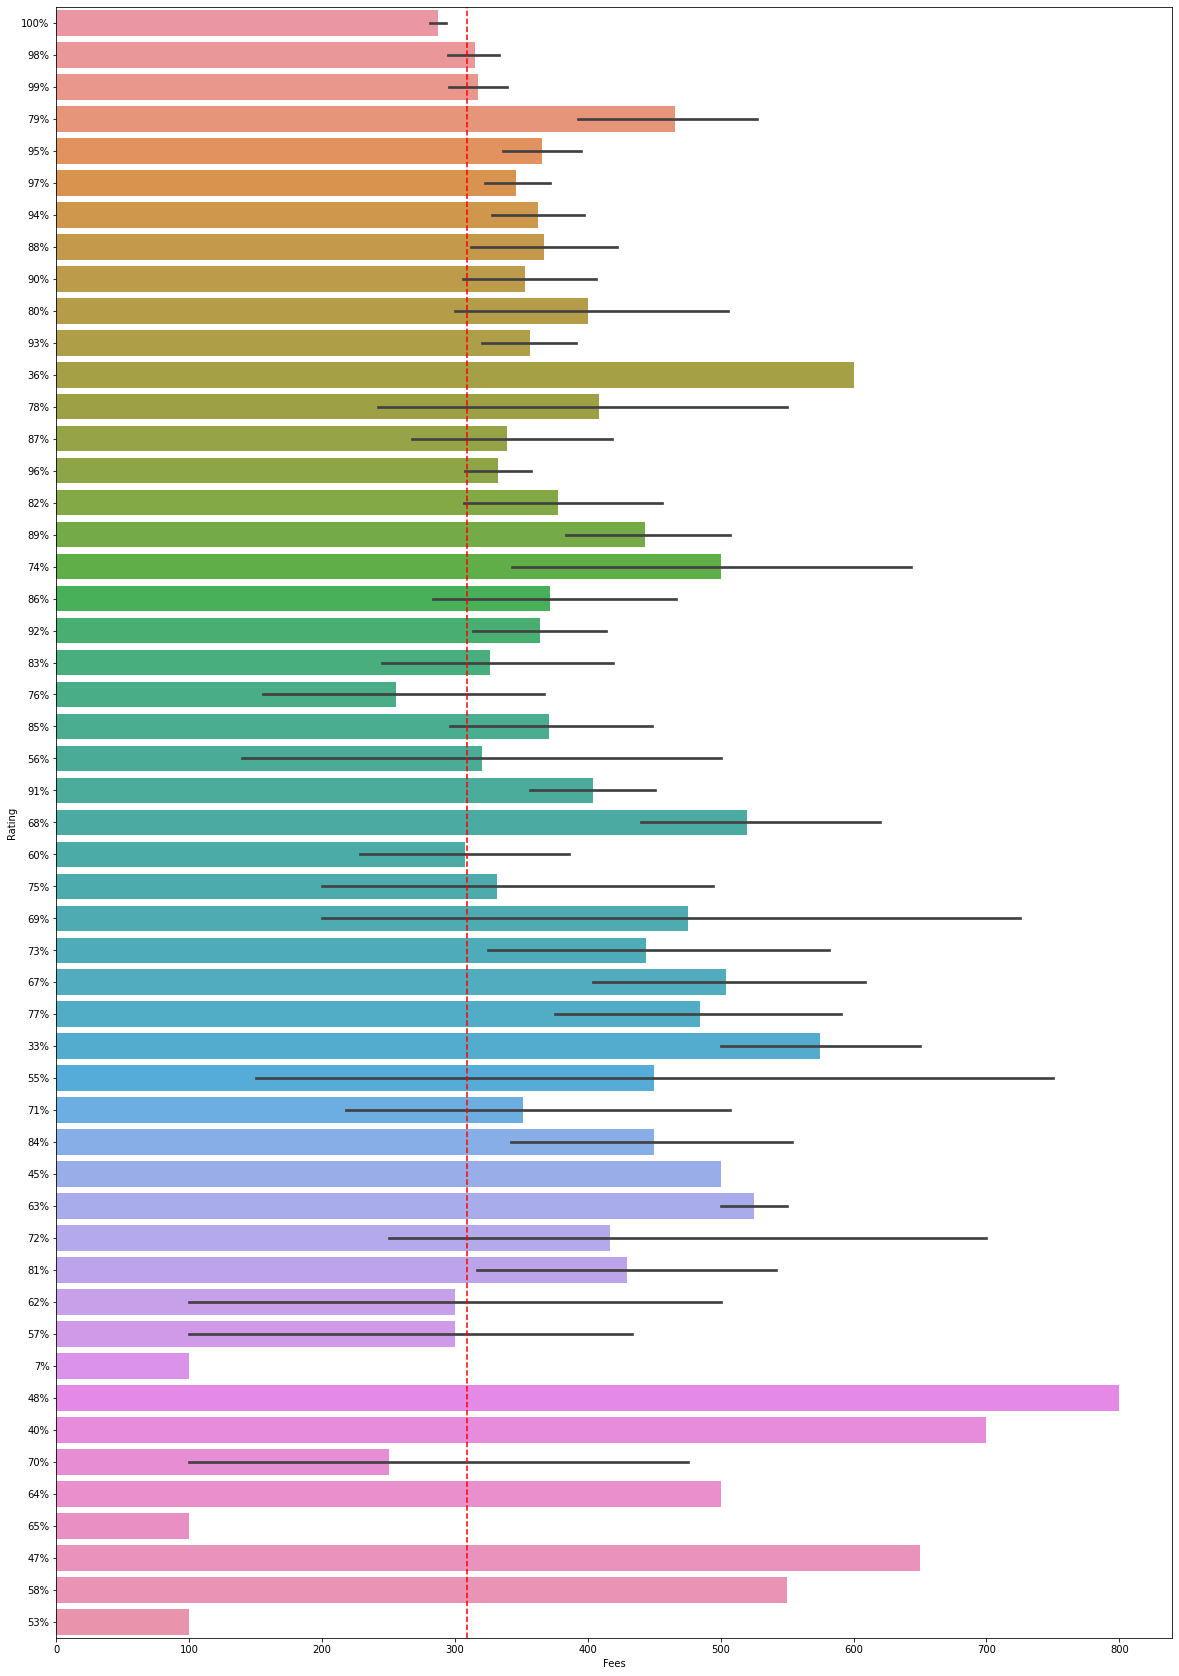

In [21]:
plt.figure(figsize=(20,30))
sns.barplot(x="Fees", y="Rating", data=data)
plt.axvline(mean_fee, color="red", linestyle="dashed")
plt.show()

In [22]:
print("Observation: 48% Rating has max Fees")

Observation: 48% Rating has max Fees


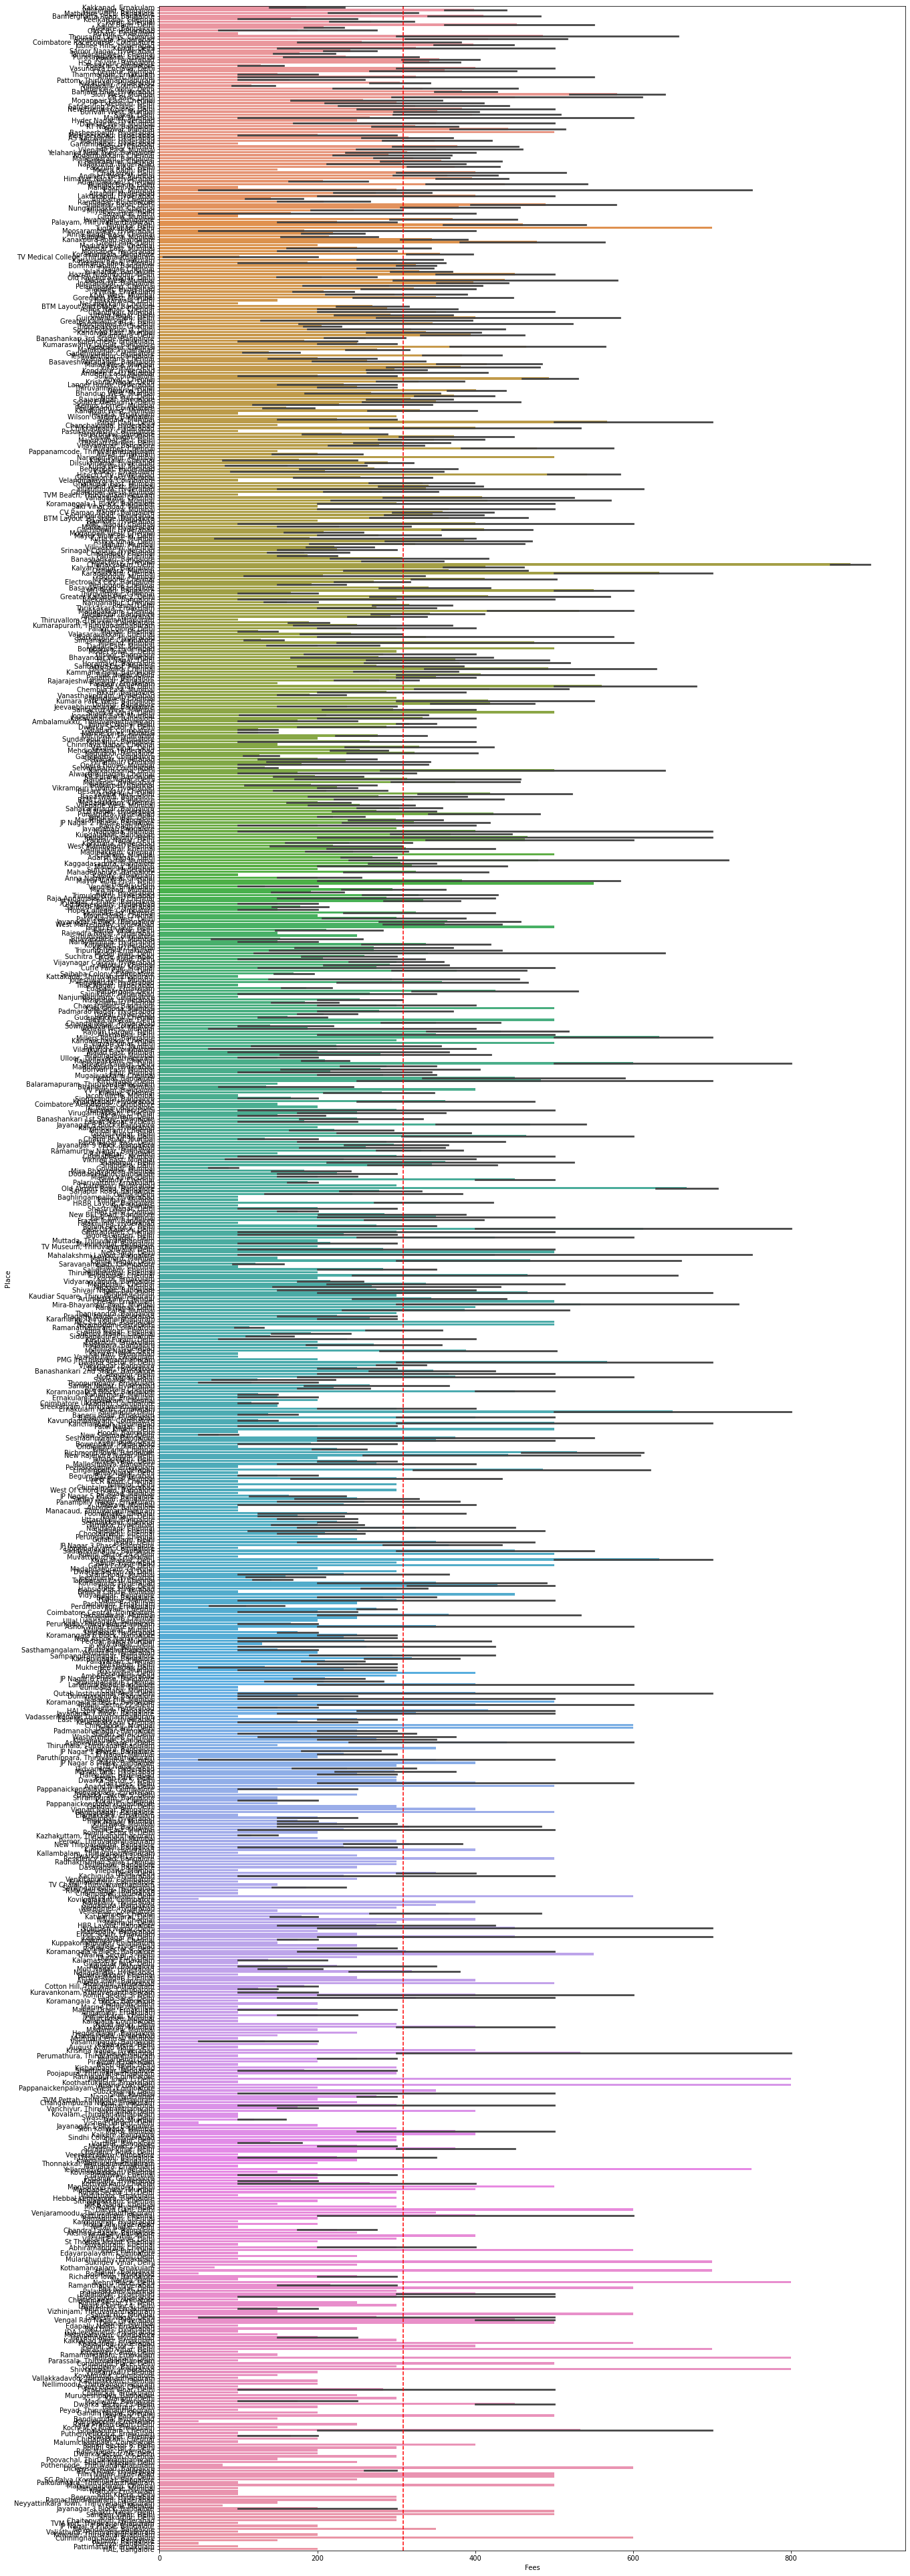

In [23]:
plt.figure(figsize=(20,70))
sns.barplot(x="Fees", y="Place", data=data)
plt.axvline(mean_fee, color="red", linestyle="dashed")
plt.show()

In [24]:
data.Profile.value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1009
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

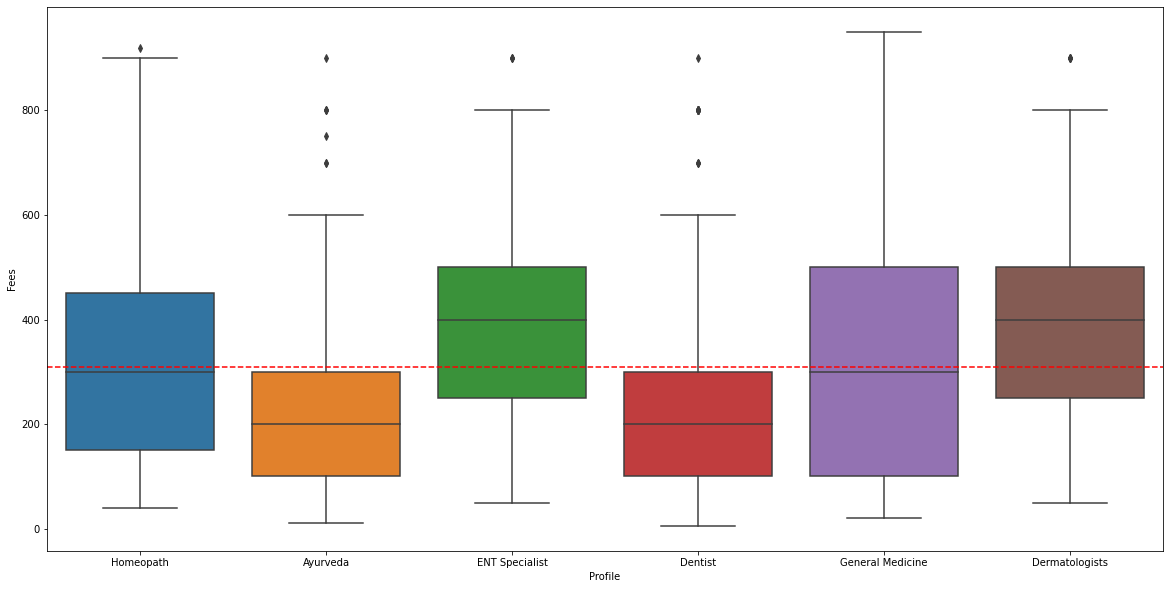

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(y="Fees", x="Profile", data=data)
plt.axhline(mean_fee, color="red", linestyle="dashed")
plt.show()

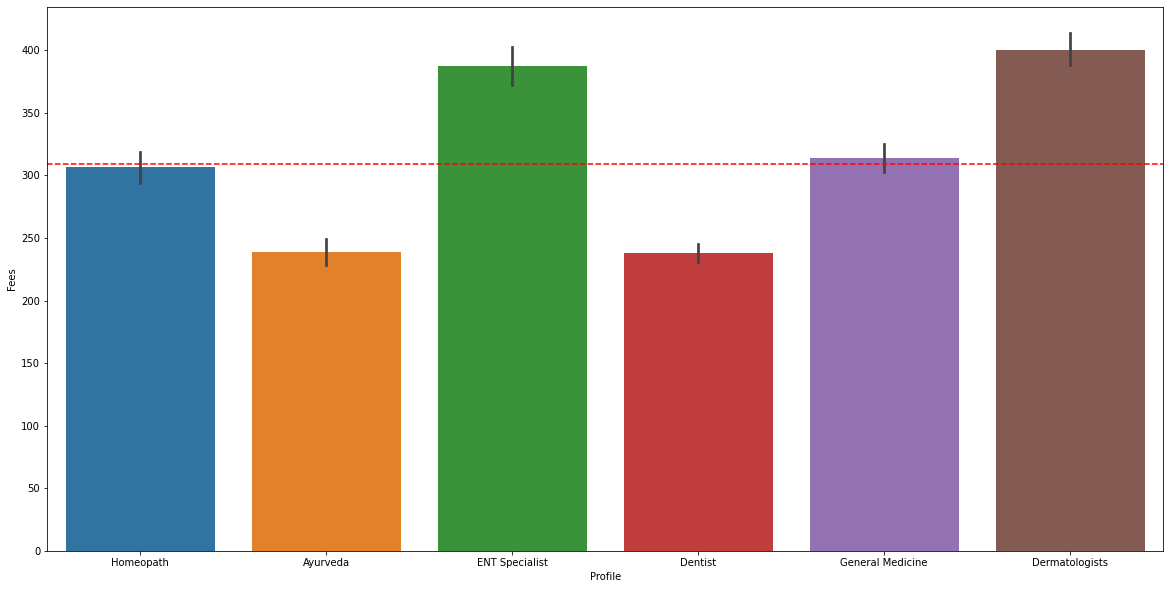

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(y="Fees", x="Profile", data=data)
plt.axhline(mean_fee, color="red", linestyle="dashed")
plt.show()

In [27]:
print("Obsevation: Dermatologists profile doctors have higher fee than others.")

Obsevation: Dermatologists profile doctors have higher fee than others.


In [10]:
dumm_data=pd.get_dummies(data)

In [28]:
##OR, apply Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data["Profile"])
data["Profile"]=le.fit_transform(data["Profile"])

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data["Qualification"])
data["Qualification"]=le.fit_transform(data["Qualification"])

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data["Experience"])
data["Experience"]=le.fit_transform(data["Experience"])

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data["Rating"])
data["Rating"]=le.fit_transform(data["Rating"])

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data["Place"])
data["Place"]=le.fit_transform(data["Place"])

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data["Miscellaneous_Info"])
data["Miscellaneous_Info"]=le.fit_transform(data["Miscellaneous_Info"])

In [10]:
dumm_data.head()
dumm_data.shape

(5936, 5416)

In [11]:
data_test.head(3)
data_test.isnull().sum()
data_test.dropna(inplace=True)

In [12]:
data_test.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

In [13]:
dumm_test=pd.get_dummies(data_test)

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data_test["Profile"])
data_test["Profile"]=le.fit_transform(data_test["Profile"])

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data_test["Qualification"])
data_test["Qualification"]=le.fit_transform(data_test["Qualification"])

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data_test["Experience"])
data_test["Experience"]=le.fit_transform(data_test["Experience"])

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data_test["Rating"])
data_test["Rating"]=le.fit_transform(data_test["Rating"])

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data_test["Place"])
data_test["Place"]=le.fit_transform(data_test["Place"])

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data_test["Miscellaneous_Info"])
data_test["Miscellaneous_Info"]=le.fit_transform(data_test["Miscellaneous_Info"])

In [38]:
data.describe()

Qualification   Experience       Rating        Place      Profile  \
count    5936.000000  5936.000000  5936.000000  5936.000000  5936.000000   
mean      596.381065    23.105458    14.595350   415.152965     2.443733   
std       414.278535    20.929585    21.161003   258.807963     1.661254   
min         0.000000     0.000000     0.000000     0.000000     0.000000   
25%       219.000000     6.000000     0.000000   193.000000     1.000000   
50%       595.000000    15.000000     0.000000   408.000000     2.000000   
75%       942.000000    36.000000    42.000000   631.000000     4.000000   
max      1418.000000    63.000000    50.000000   876.000000     5.000000   

       Miscellaneous_Info         Fees  
count         5936.000000  5936.000000  
mean          1573.252695   308.811995  
std            641.733976   190.851554  
min              0.000000     5.000000  
25%           1470.750000   150.000000  
50%           1595.000000   300.000000  
75%           1752.250000   500.000000  
max           2997.000000   950.000000

In [39]:
print("obsevation: Maximum Fees is 950 where the mean of the fees is 308.81") 

obsevation: Maximum Fees is 950 where the mean of the fees is 308.81


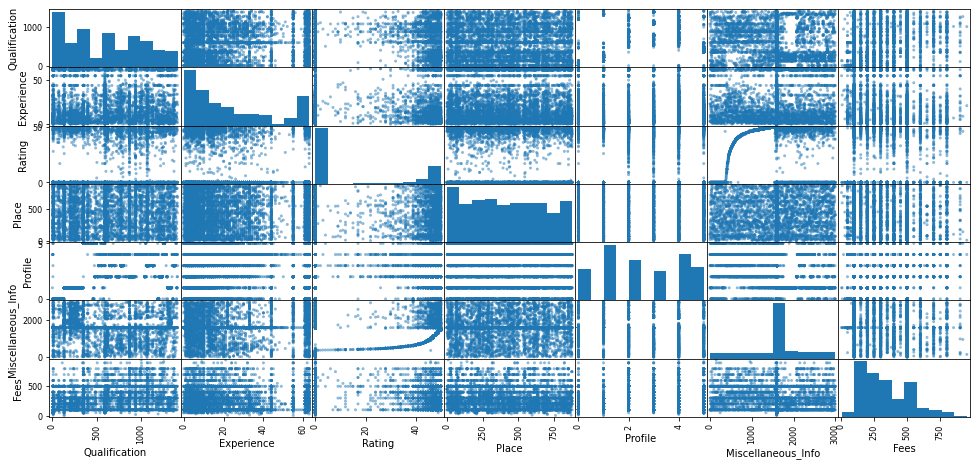

In [40]:
scatter_matrix(data, figsize=(16.5,7.5))
plt.show()

In [ ]:
corrmat=data.corr()

In [ ]:
plt.figure(figsize=(12,6))
m=np.ones_like(corrmat)
m[np.tril_indices_from(m)]=0
sns.heatmap(corrmat, annot=True, cmap="Accent", mask=m)

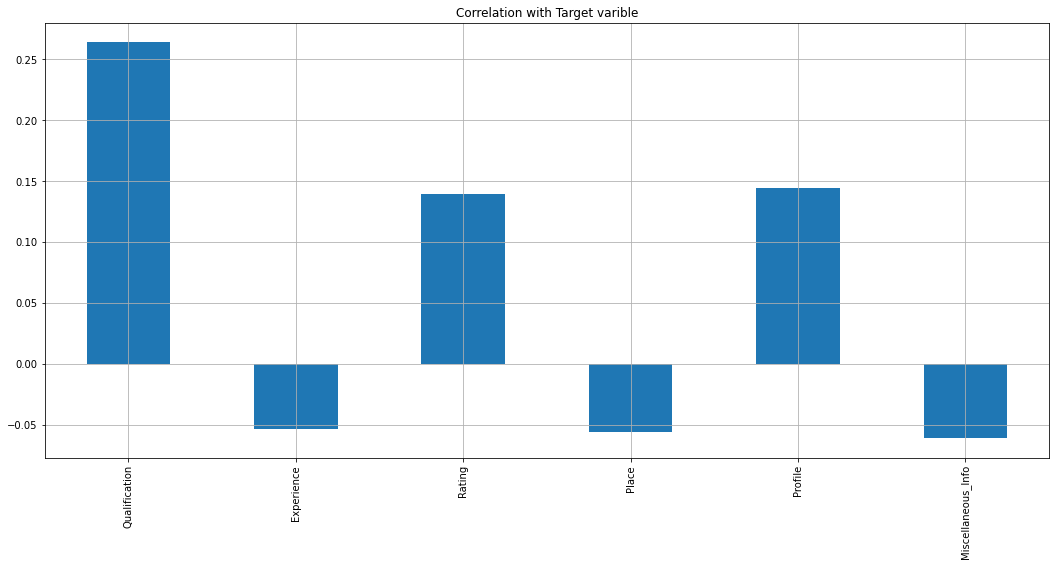

In [43]:
#corelation of preidictors with target varible
plt.figure(figsize=(18,8))
data.drop("Fees",axis=1).corrwith(data["Fees"]).plot(kind="bar", grid=True)
plt.xticks(rotation="vertical")
plt.title("Correlation with Target varible")
plt.show()

In [14]:
#to handle the outliers
from scipy.stats import zscore
z=abs(zscore(dumm_data))
data_mod=dumm_data[(z<3).all(axis=1)]

In [15]:
dumm_data.shape, data_mod.shape

((5936, 5416), (0, 5416))

In [16]:
X=dumm_data.drop(columns="Fees")
y=dumm_data.Fees

In [17]:
#performing standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_=sc.fit_transform(X)
X_mod=pd.DataFrame(X_, columns=X.columns)

In [18]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test=split(X_mod,y, random_state=123, test_size=.2)

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score,roc_auc_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score

In [20]:
model=[LinearRegression(), Ridge(), Lasso(), ElasticNet(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]

In [21]:
for m in model:
    m.fit(X_train, y_train)
    score=m.score(X_train, y_train)
    y_pred=m.predict(X_test)
    print("For Model:", m,"Score:", score)
    print("R2 Score:", r2_score(y_test, y_pred))
    print("Mean_Absolute Error", mean_absolute_error(y_test, y_pred))
    print("Mean_Squared_error:", np.sqrt(y_test, y_pred))

For Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) Score: -0.09840748709823964
R2 Score: -2.8962769671702707e+29
Mean_Absolute Error 5.873317595737124e+16
Mean_Squared_error: 2663    15.811388
4708    17.320508
1095    22.360680
2330    21.213203
427     10.000000
          ...    
4203    22.360680
3085    25.495098
3889    15.811388
5831    22.360680
2123    14.142136
Name: Fees, Length: 1188, dtype: float64
For Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) Score: 0.8758234027391735
R2 Score: -0.1428362649159487
Mean_Absolute Error 153.5222815635367
Mean_Squared_error: 2663    15.811388
4708    17.320508
1095    22.360680
2330    21.213203
427     10.000000
          ...    
4203    22.360680
3085    25.495098
3889    15.811388
5831    22.360680
2123    14.142136
Name: Fees, Length: 1188, dtype: float64
For Model: Lasso(alpha=1.0, copy_X=True, fit_inte

In [ ]:
models=[LinearRegression(), Ridge(), Lasso(), ElasticNet(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]
for m in model:
    score=cross_val_score(m,X_mod,y, cv=10, scoring="r2")
    print("For Model:", m,"Score:", score)
    print("Mean Score:", score.mean())
    print("Std", score.std())    

In [ ]:
print("Observation: Random Forest Rgressor is giving highest score and r2 score.")

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={"random_state": range(42,200)}
clf=GridSearchCV(ElasticNet(), param_grid)
clf.fit(X_train,y_train)
clf.best_params_

In [61]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test=split(X_mod,y, random_state=92, test_size=.2)
final_model=ElasticNet()
final_model.fit(X_train, y_train)
final_model.score(X_train, y_train)
y_pred=final_model.predict(X_test)
print("for Model",final_model , "Accuracy Score:", r2_score(y_test,y_pred))
print("mse:",mean_absolute_error(y_test, y_pred))
print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))

for Model RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) Accuracy Score: 0.1634288599460766
mse: 136.54557036947662
rmse: 174.4805945398478


In [62]:
from sklearn.externals import joblib
joblib.dump(final_model, "Model_Doctor_Fees_predictor.obj")

['Model_Doctor_Fees_predictor.obj']